In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import mariadb
import os
from dotenv import load_dotenv
import sqlalchemy
import matplotlib.pyplot as plt
import seaborn as sns
from src.Tag import Tag
%load_ext autoreload
%autoreload 2

load_dotenv() 

mydb = mariadb.connect(
    host = os.getenv('HOST'),
    user = os.getenv('USER'),
    passwd = os.getenv('PASSWD'),
    database = os.getenv('DATABASE')
    )

def query_data_old(table,start_from,end_at):
    query = 'select * from {} WHERE LOCAL_TIME >= \'{}\' and LOCAL_TIME <= \'{}\';'.format(table,start_from,end_at)
    
    return pd.read_sql(query, con=mydb)

df = query_data_old('cleaned_data','2022-07-01','2022-07-02') 
df['AREA_NAME'] = df['AREA_NAME'].fillna('No area specified')
df = df.sort_values(by=['TAG_ID', 'EPOCHTIME'])

C:\Users\320159994\AppData\Local\miniforge3\envs\contacttracing\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [2]:
def add_time_diff(df, tag_type):
    temp = df.copy()
    temp = df.copy()
    temp = temp.sort_values(by=['TAG_ID', 'EPOCHTIME'])  
    temp = temp[(temp.MONITOR_ID != 0)]
    temp['TIME_DIFF'] = np.where((temp.TAG_ID == temp.TAG_ID.shift(-1)), (temp.LOCAL_TIME.shift(-1)-temp.LOCAL_TIME)/pd.Timedelta(minutes=1),0)  
    temp = temp.loc[temp['TAG_TYPE']==tag_type]
    temp = temp.reset_index()
    return temp


In [26]:
patients

,index,EPOCHTIME,TAG_ID,MONITOR_ID,BUTTON1,BUTTON2,BUTTON3,BUTTON4,MOTION,BATTERY_LEVEL,...,MODE,ZONE_ID_WIFI,PF_MONITOR_ID,MASTER_MONITOR_ID,PF_TAG_ID,LOCAL_TIME,ZONE_NAME,ZONE_TYPE,AREA_NAME,TIME_DIFF
0,43,1656633613,17335070,512765,0,0,0,0,0,0,...,0,0,5237,512765.0,361292291.0,2022-07-01 00:00:13,Aufnahme,REG,Aufnahme,0.000000
1,44,1656633613,17335070,512765,0,0,0,0,0,0,...,0,0,5237,512765.0,361292291.0,2022-07-01 00:00:13,Aufnahme,REG,Aufnahme,0.000000
2,46,1656633613,17335070,512765,0,0,0,0,0,0,...,0,0,5237,512765.0,361292291.0,2022-07-01 00:00:13,Aufnahme,REG,Aufnahme,0.000000
3,47,1656633613,17335070,512765,0,0,0,0,0,0,...,0,0,5237,512765.0,361292291.0,2022-07-01 00:00:13,Aufnahme,REG,Aufnahme,0.016667
4,50,1656633614,17335070,512765,0,0,0,0,0,0,...,0,0,5237,512765.0,361292291.0,2022-07-01 00:00:14,Aufnahme,REG,Aufnahme,4.983333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242154,512285,1656719902,17424785,358552,0,0,0,1,0,0,...,0,0,2020,358552.0,397758037.0,2022-07-01 23:58:22,Dropbox Pflegestützpunkt Innere,Dropbox,Dropbox,0.000000
242155,512286,1656719902,17424785,358552,0,0,0,1,0,0,...,0,0,2020,358552.0,397758037.0,2022-07-01 23:58:22,Dropbox Pflegestützpunkt Innere,Dropbox,Dropbox,0.016667
242156,512289,1656719903,17424785,358552,0,0,0,1,0,0,...,0,0,2020,358552.0,397758037.0,2022-07-01 23:58:23,Dropbox Pflegestützpunkt Innere,Dropbox,Dropbox,0.000000
242157,512291,1656719903,17424785,358552,0,0,0,1,0,0,...,0,0,2020,358552.0,397758037.0,2022-07-01 23:58:23,Dropbox Pflegestützpunkt Innere,Dropbox,Dropbox,0.016667


### Motion Analysis for Patient and Asset Tags

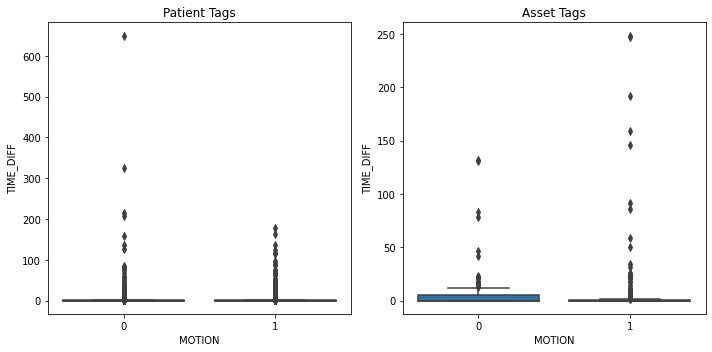

In [6]:
patients = add_time_diff(df, 19)
# patients = patients.loc[patients['TIME_DIFF'] <= 60]
assets = add_time_diff(df, 15)
# assets = assets.loc[assets['TIME_DIFF'] <= 60]


fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.boxplot(ax=ax[0],x='MOTION', y='TIME_DIFF',data=patients)
sns.boxplot(ax=ax[1],x='MOTION', y='TIME_DIFF',data=assets)
ax[0].set_title('Patient Tags')
ax[1].set_title('Asset Tags')

fig.tight_layout()
plt.show()

#Inference
- Patient and asset tags send signals every 5 minutes most of the time
- It still varies when in motion and when not in motion

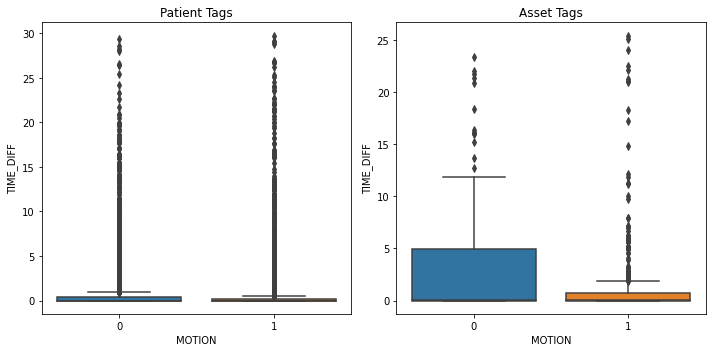

In [7]:
patients = add_time_diff(df, 19)
patients = patients.loc[patients['TIME_DIFF'] <= 30]
assets = add_time_diff(df, 15)
assets = assets.loc[assets['TIME_DIFF'] <= 30]


fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.boxplot(ax=ax[0],x='MOTION', y='TIME_DIFF',data=patients)
sns.boxplot(ax=ax[1],x='MOTION', y='TIME_DIFF',data=assets)
ax[0].set_title('Patient Tags')
ax[1].set_title('Asset Tags')

fig.tight_layout()
plt.show()

### Time Between Consecutive Signals

C:\Users\320159994\AppData\Local\miniforge3\envs\contacttracing\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TIME_DIFF'>

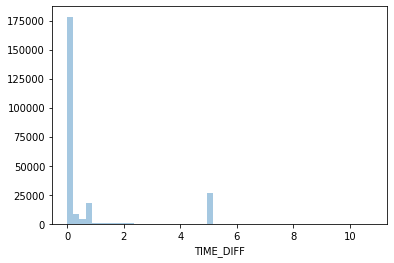

In [15]:
import seaborn as sns
patients = add_time_diff(df, 19)
v = patients.TIME_DIFF.value_counts()
patients = patients[patients.TIME_DIFF.isin(v.index[v.gt(10)])]
sns.distplot(patients['TIME_DIFF'],kde=False)

In [25]:
patients['TIME_DIFF'].value_counts().rename_axis('unique_values').reset_index(name='TIME_DIFF_counts')

,unique_values,TIME_DIFF_counts
0,0.000000,127816
1,0.016667,40259
2,5.000000,13862
3,4.983333,11322
4,0.800000,7577
...,...,...
298,4.616667,11
299,2.933333,11
300,2.950000,11
301,4.783333,11


C:\Users\320159994\AppData\Local\miniforge3\envs\contacttracing\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TIME_DIFF'>

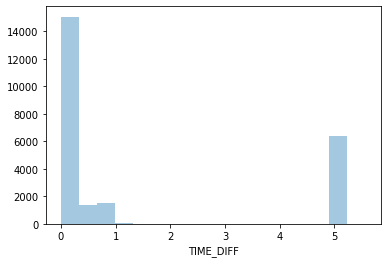

In [13]:
assets = add_time_diff(df, 15)
v = assets.TIME_DIFF.value_counts()
assets = assets[assets.TIME_DIFF.isin(v.index[v.gt(10)])]
sns.distplot(assets['TIME_DIFF'],kde=False)

In [20]:
assets['TIME_DIFF'].value_counts().rename_axis('unique_values').reset_index(name='TIME_DIFF_counts')

,unique_values,TIME_DIFF_counts
0,0.000000,9951
1,5.000000,4214
2,0.016667,3800
3,4.983333,1779
4,0.800000,623
...,...,...
60,0.866667,12
61,0.616667,12
62,5.050000,12
63,0.683333,11
